# Search stocks

In [1]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/E-mini')[0]
tickers = df['Ticker symbol'].values.tolist()
tickers

['ES',
 'MES',
 'EME',
 'YM',
 'MYM',
 'EMD',
 'SMC',
 'NQ',
 'MNQ',
 'QCN',
 'BIO',
 'EMF',
 'FXN',
 'J7',
 'E7',
 'XAY',
 'XAP',
 'XAF',
 'XAV',
 'XAI',
 'XAB',
 'XAK',
 'XAU',
 'YC',
 'YK',
 'YW',
 'QM',
 'QG',
 'QH',
 'QU',
 'QO',
 '6Q',
 'QC',
 'RF',
 'TF',
 'M2K']

In [3]:
#f = ES,NQ,YM,TF,6A,6B,6C,6E,6J,6N,DX,6S,CL,QM,NG,HO,GC,YG,SI,YI,HG,PL,6A,ACD,AJY,ANE,6L,6B,PJY,PSF,MP,6C,CJY,6E,EC,E7,EAD,RP,RY,RF,6J,J7,KRW,6M,MP,6N,NOK,6R,6Z,SEK,6S,SJY,DX,CL,BZ,EH,HO,NN,NG,RB,UX,CB,CC,CJ,KC,KT,TT,CT,DY,LB,LBS,DC,GDK,GNF,OJ,YO,SB,SF


futures = [
"ES",
"YM",
"NQ",
"RTY",
"ZB",
"ZN",
"ZF",
"ZT",
"GC",
"MGC",
"SI",
"SIL",
"PL",
"HG",
"PA",
"CL",
"HO",
"NG",
"RB",
"BZ",
"B0",
"ZC",
"ZO",
"KE",
"ZR",
"ZM",
"ZL",
"ZS",
"GF",
"HE",
"LE",
"CC",
"KC",
"CT",
"LBS",
"OJ",
"SB",
"VX"
]
futures = set(map(lambda x: x + '=F', futures + tickers))

ma_count = 21

futures


{'6Q=F',
 'B0=F',
 'BIO=F',
 'BZ=F',
 'CC=F',
 'CL=F',
 'CT=F',
 'E7=F',
 'EMD=F',
 'EME=F',
 'EMF=F',
 'ES=F',
 'FXN=F',
 'GC=F',
 'GF=F',
 'HE=F',
 'HG=F',
 'HO=F',
 'J7=F',
 'KC=F',
 'KE=F',
 'LBS=F',
 'LE=F',
 'M2K=F',
 'MES=F',
 'MGC=F',
 'MNQ=F',
 'MYM=F',
 'NG=F',
 'NQ=F',
 'OJ=F',
 'PA=F',
 'PL=F',
 'QC=F',
 'QCN=F',
 'QG=F',
 'QH=F',
 'QM=F',
 'QO=F',
 'QU=F',
 'RB=F',
 'RF=F',
 'RTY=F',
 'SB=F',
 'SI=F',
 'SIL=F',
 'SMC=F',
 'TF=F',
 'VX=F',
 'XAB=F',
 'XAF=F',
 'XAI=F',
 'XAK=F',
 'XAP=F',
 'XAU=F',
 'XAV=F',
 'XAY=F',
 'YC=F',
 'YK=F',
 'YM=F',
 'YW=F',
 'ZB=F',
 'ZC=F',
 'ZF=F',
 'ZL=F',
 'ZM=F',
 'ZN=F',
 'ZO=F',
 'ZR=F',
 'ZS=F',
 'ZT=F'}

In [4]:
data = pdr.get_data_yahoo(futures, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


[*********************100%***********************]  71 of 71 completed

17 Failed downloads:
- EMF=F: No data found, symbol may be delisted
- SMC=F: No data found, symbol may be delisted
- XAY=F: No data found for this date range, symbol may be delisted
- B0=F: No data found for this date range, symbol may be delisted
- VX=F: No data found, symbol may be delisted
- OJ=F: No data found for this date range, symbol may be delisted
- YC=F: No data found for this date range, symbol may be delisted
- YW=F: No data found for this date range, symbol may be delisted
- QCN=F: No data found, symbol may be delisted
- FXN=F: No data found, symbol may be delisted
- J7=F: No data found for this date range, symbol may be delisted
- E7=F: No data found for this date range, symbol may be delisted
- YK=F: No data found for this date range, symbol may be delisted
- 6Q=F: No data found, symbol may be delisted
- EMD=F: No data found for this date range, symbol may be delisted
- TF=F: No data found, symbol m

,6Q=F,B0=F,BIO=F,BZ=F,CC=F,CL=F,CT=F,E7=F,EMD=F,EME=F,...,ZB=F,ZC=F,ZF=F,ZL=F,ZM=F,ZN=F,ZO=F,ZR=F,ZS=F,ZT=F
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-02 00:00:00,NaN,NaN,5180.299805,76.169998,2290.0,75.160004,86.029999,NaN,NaN,NaN,...,160.90625,697.25,123.500000,66.820000,379.899994,132.671875,394.50,1284.0,1451.75,110.183594
2021-07-06 00:00:00,NaN,NaN,5096.399902,74.529999,2269.0,73.370003,86.379997,NaN,NaN,NaN,...,162.09375,656.00,123.773438,63.830002,355.000000,133.218750,378.25,1252.0,1363.75,110.226562
2021-07-07 00:00:00,NaN,NaN,5037.000000,73.430000,2267.0,72.199997,86.629997,NaN,NaN,NaN,...,163.28125,652.50,123.914062,64.760002,357.200012,133.546875,381.00,1260.5,1386.50,110.242188
2021-07-08 00:00:00,NaN,NaN,5040.000000,74.120003,2266.0,72.940002,85.879997,NaN,NaN,NaN,...,163.93750,638.00,124.179688,64.250000,355.299988,133.890625,385.75,1248.5,1390.25,110.285156
2021-07-09 00:00:00,NaN,NaN,5102.600098,75.550003,2318.0,74.559998,87.989998,NaN,NaN,NaN,...,162.62500,629.75,123.929688,62.410000,352.500000,133.421875,396.25,1260.0,1404.00,110.242188


In [5]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 2].size)
lead_comps_df = df[df['count'] >= 2]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

21


,name,count,ma_diff,ma_size,ma_type
19,QG=F,31,6.763410,21,daily
14,NG=F,31,6.706314,21,daily
33,ZO=F,3,4.884197,21,daily
16,PA=F,7,3.799008,21,daily
26,XAK=F,33,3.721537,21,daily
21,RB=F,2,3.109659,21,daily
12,MNQ=F,33,3.091060,21,daily
15,NQ=F,33,3.091060,21,daily
3,CT=F,5,2.607115,21,daily
20,QM=F,2,2.404854,21,daily


<ipython-input-6-1514944d5d33>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


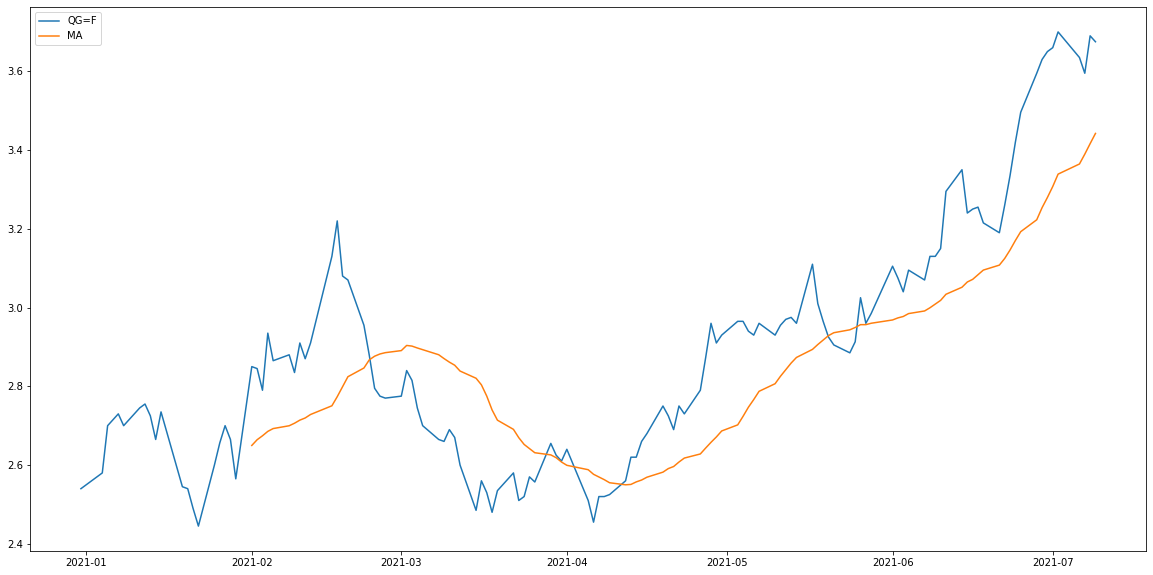

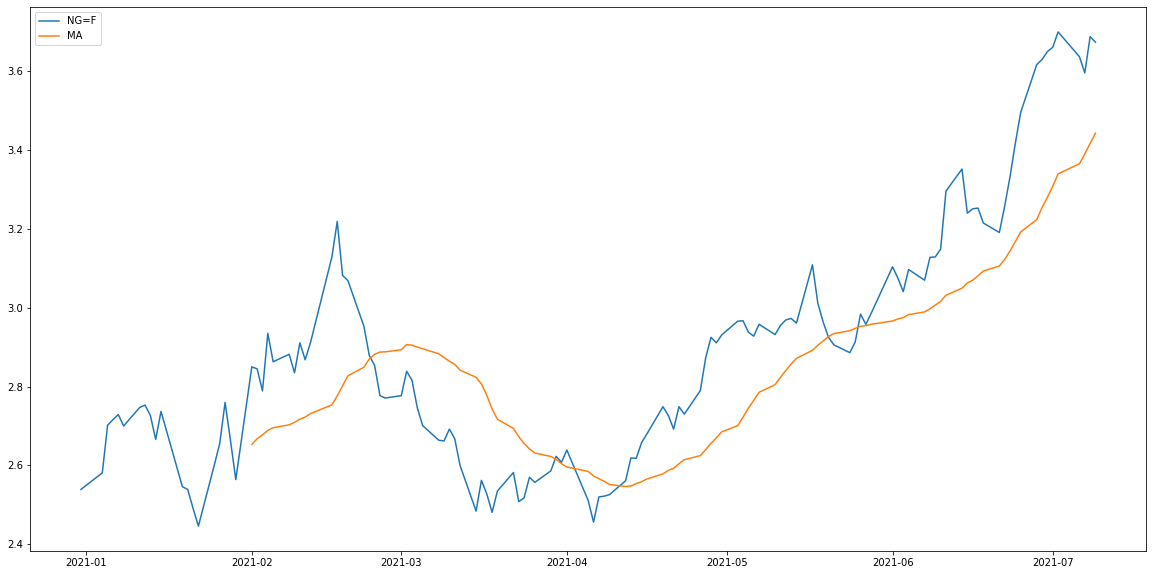

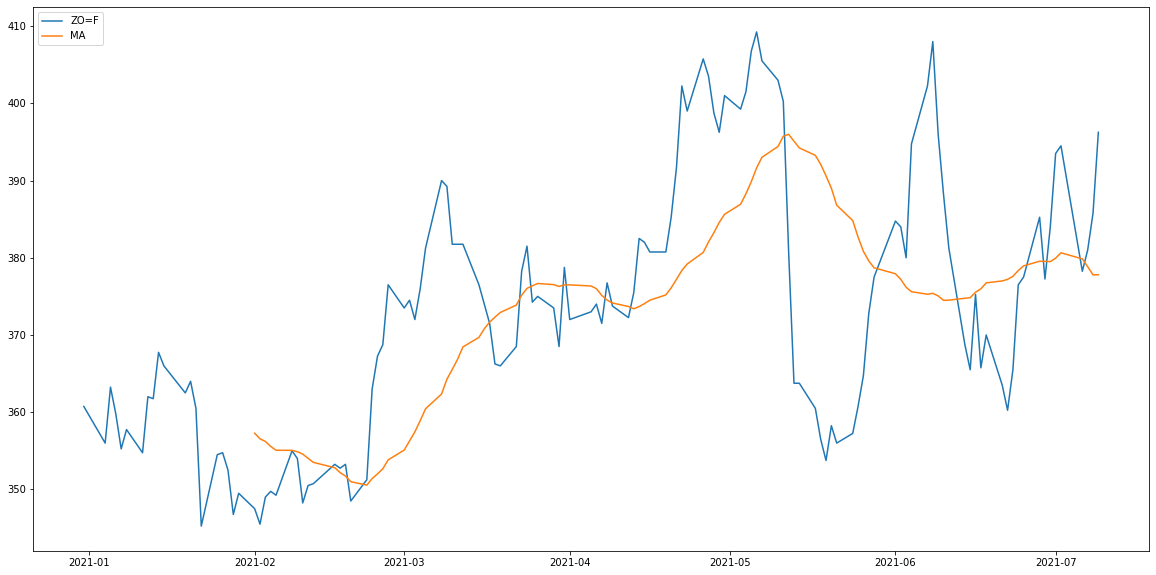

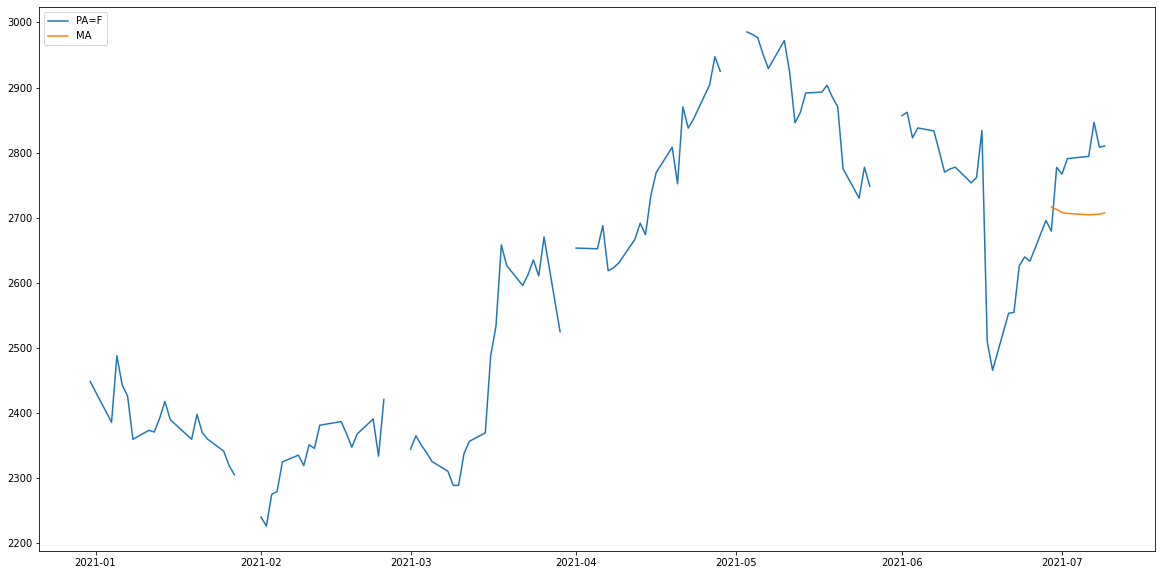

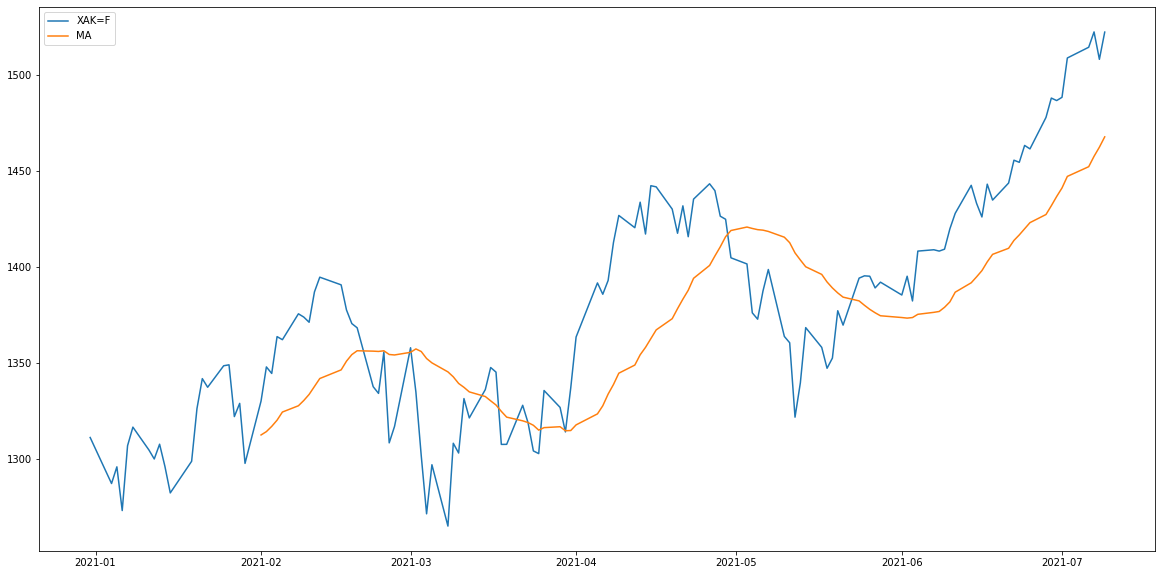

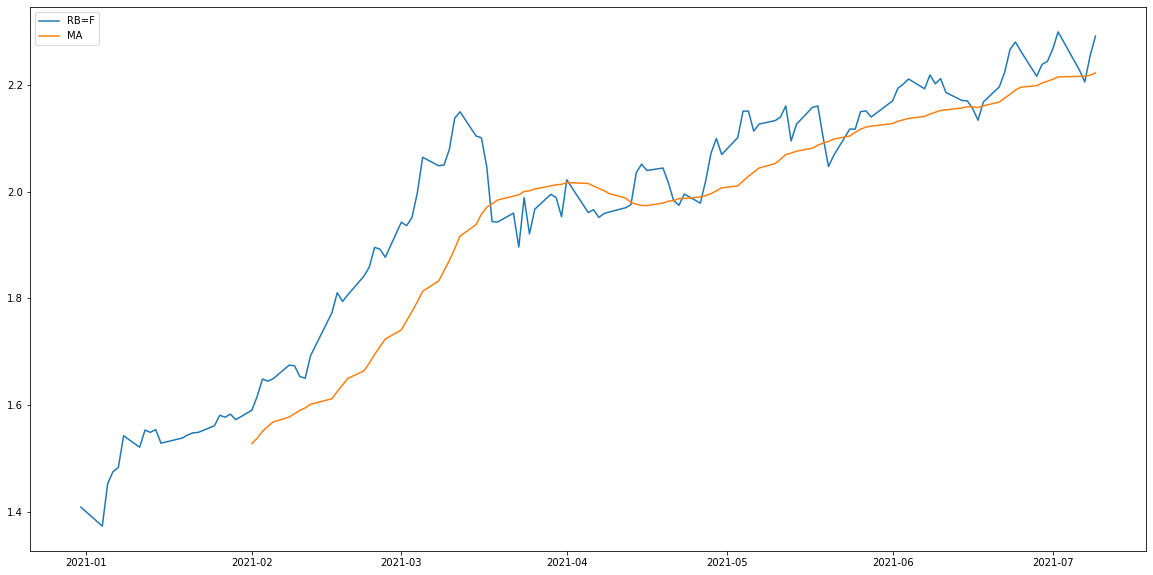

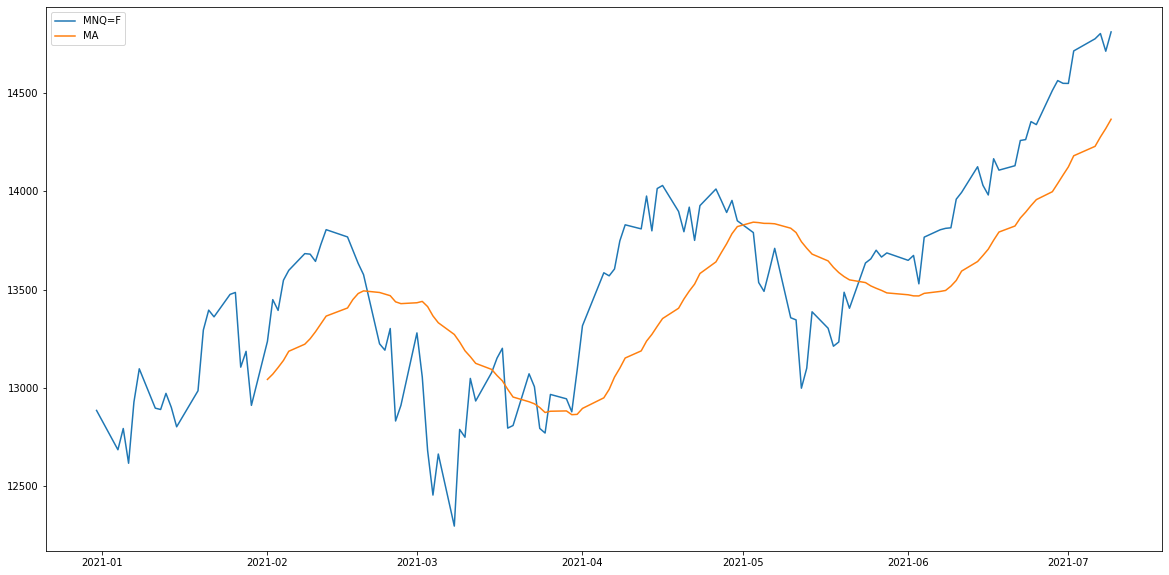

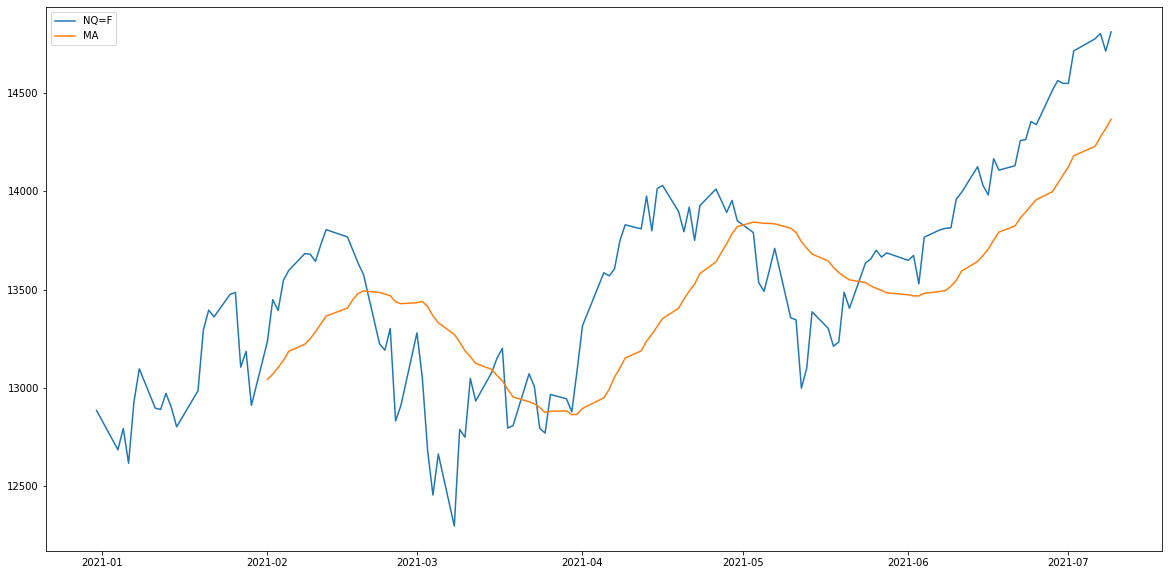

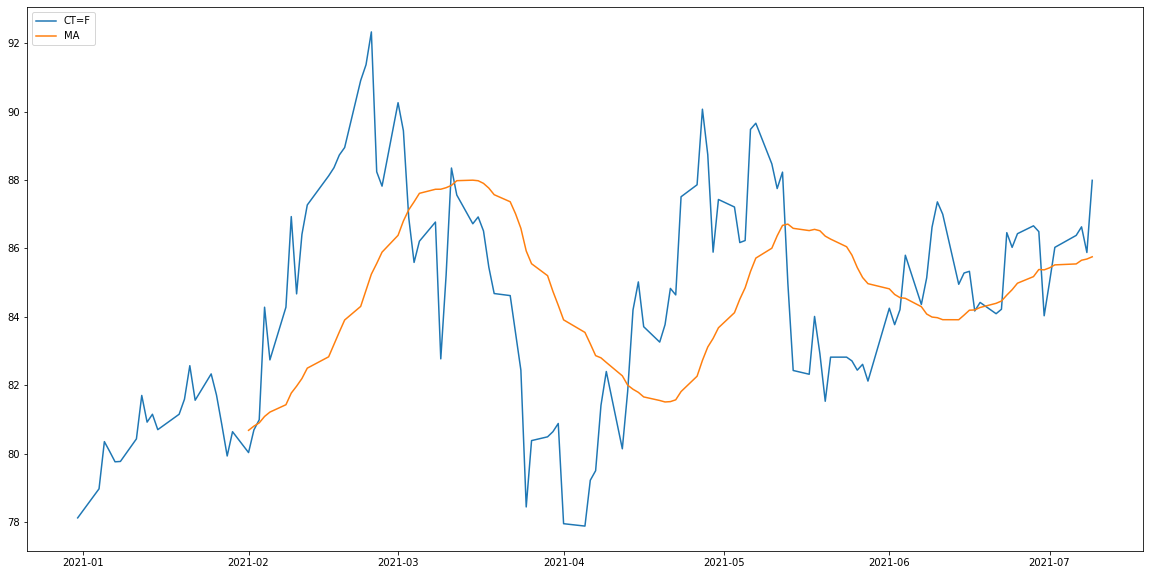

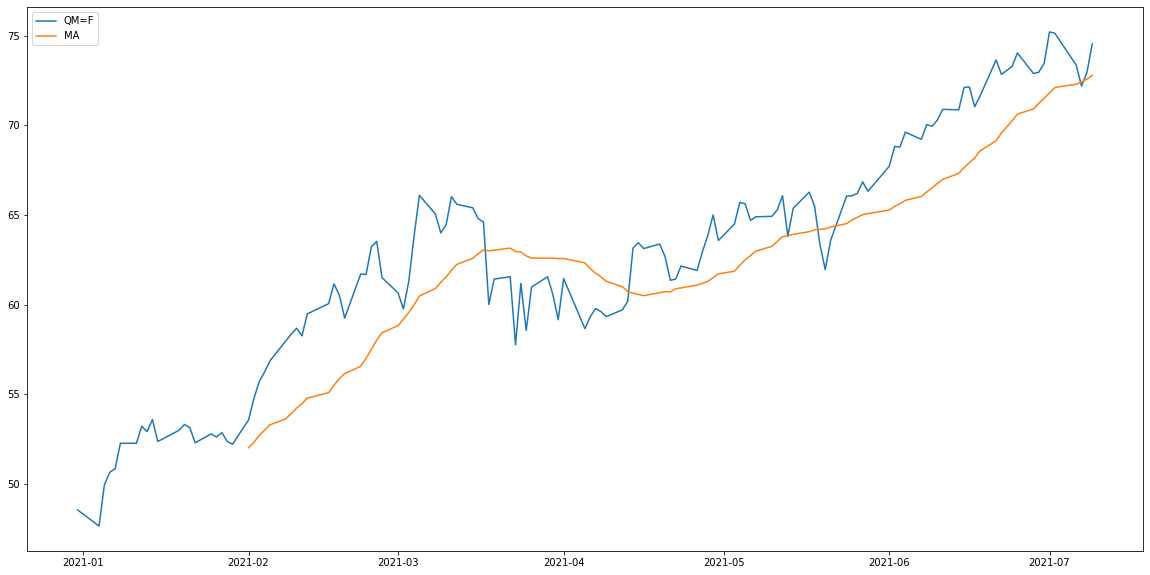

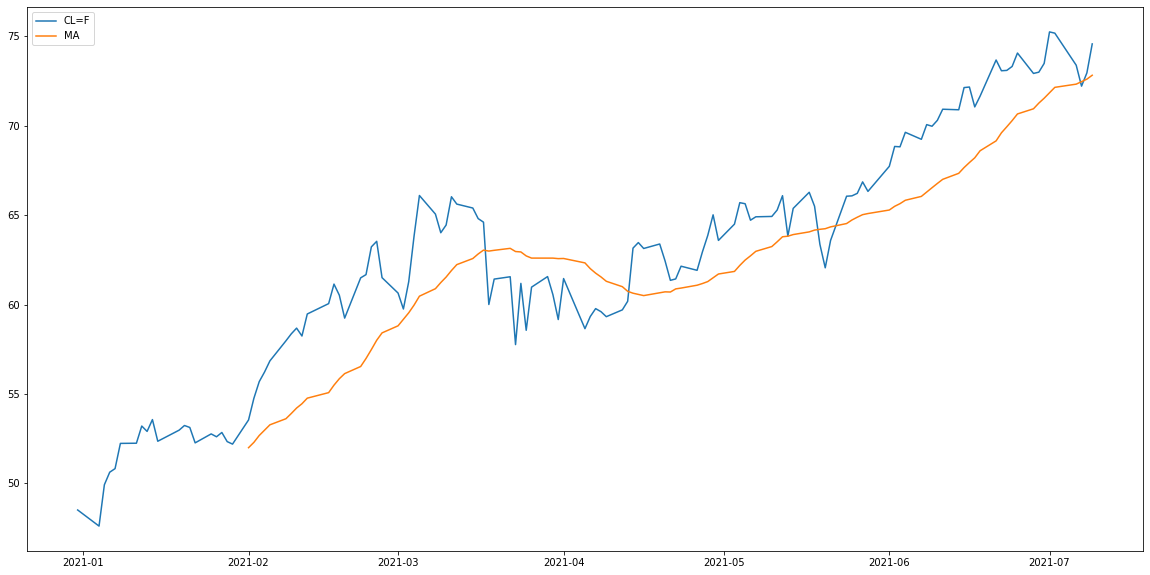

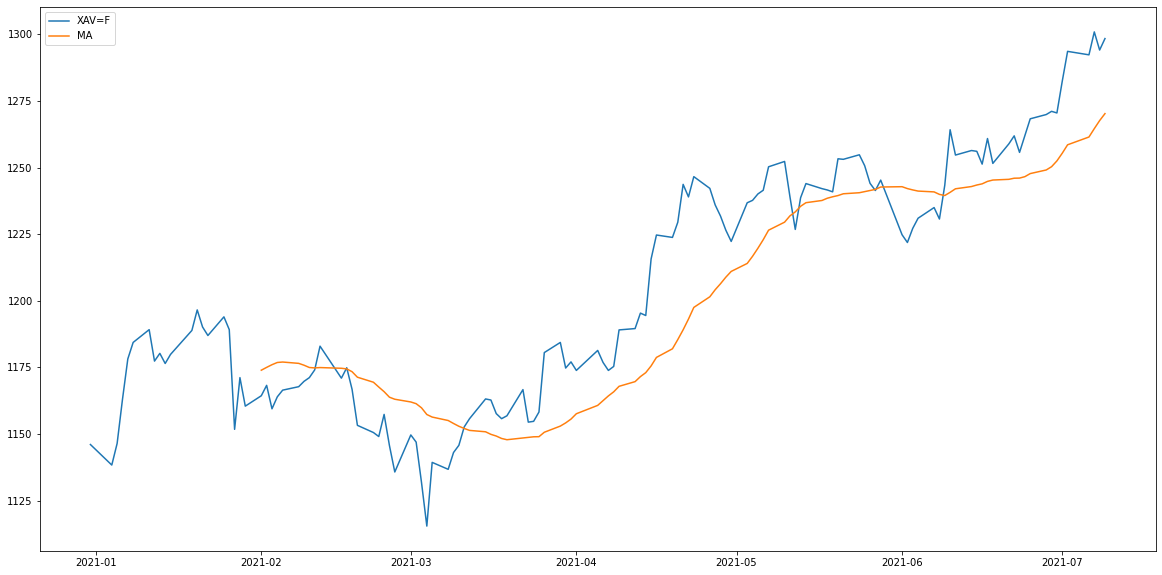

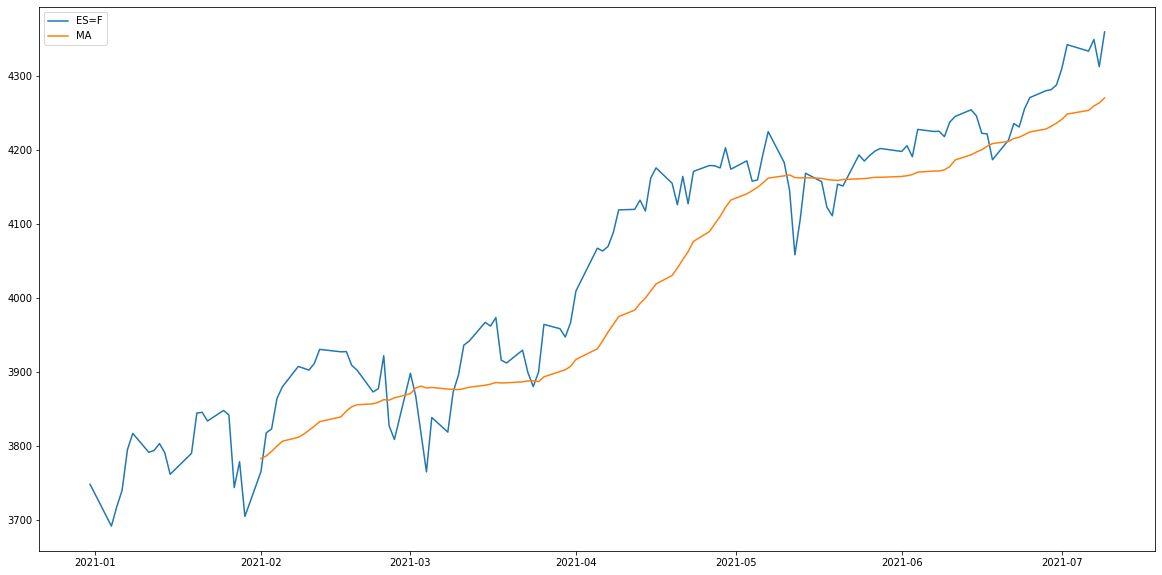

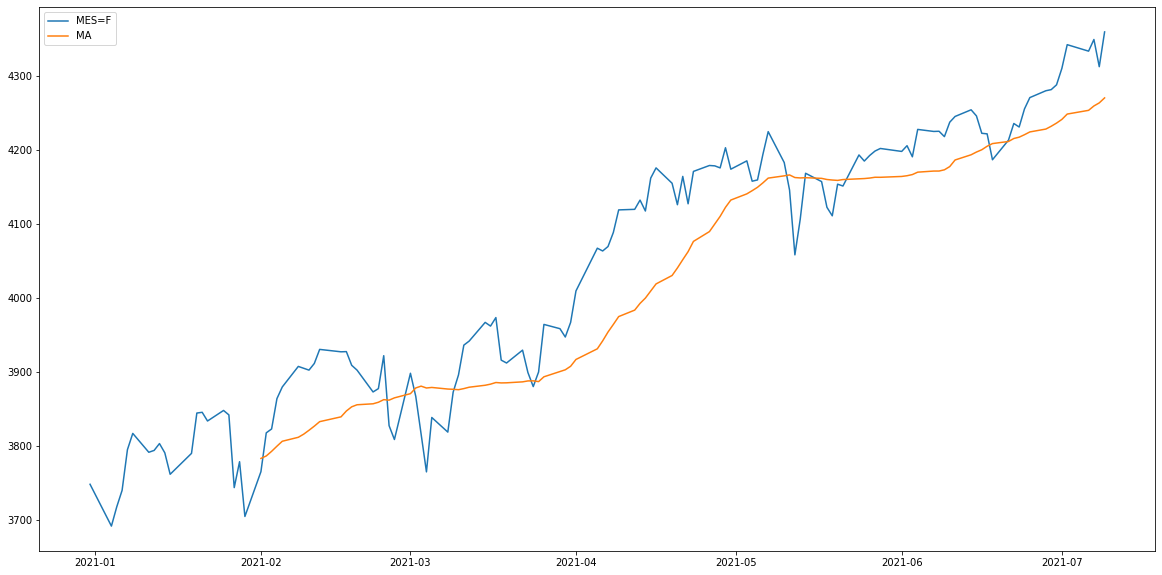

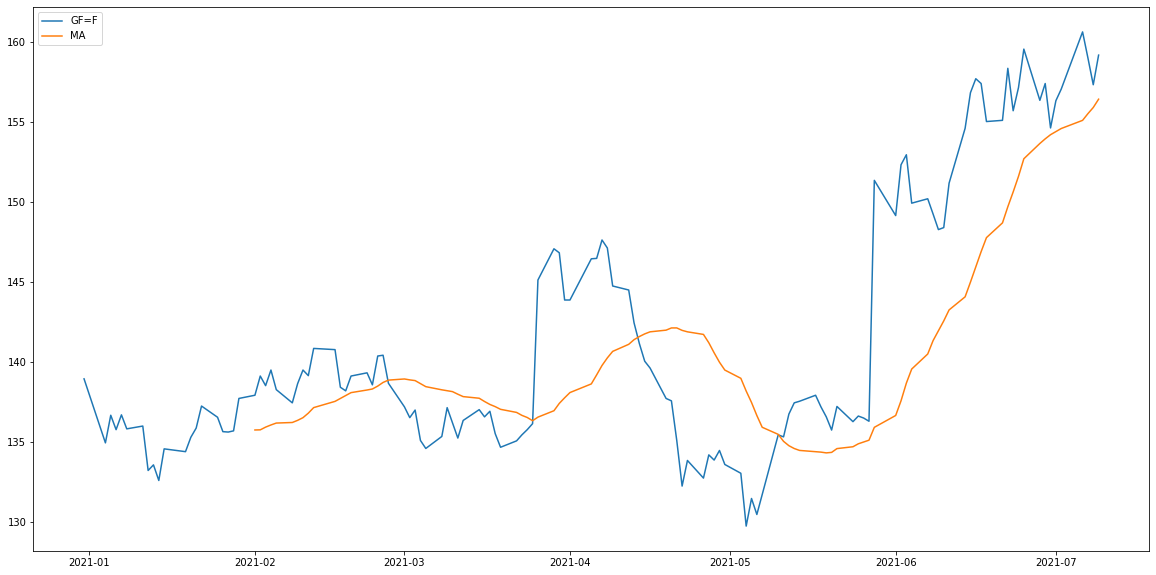

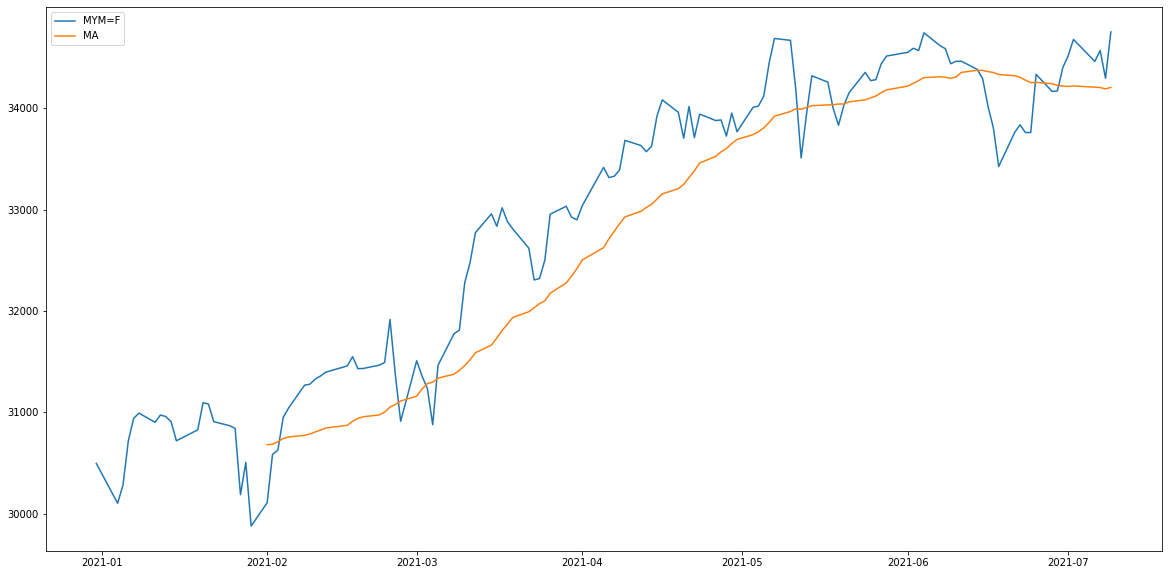

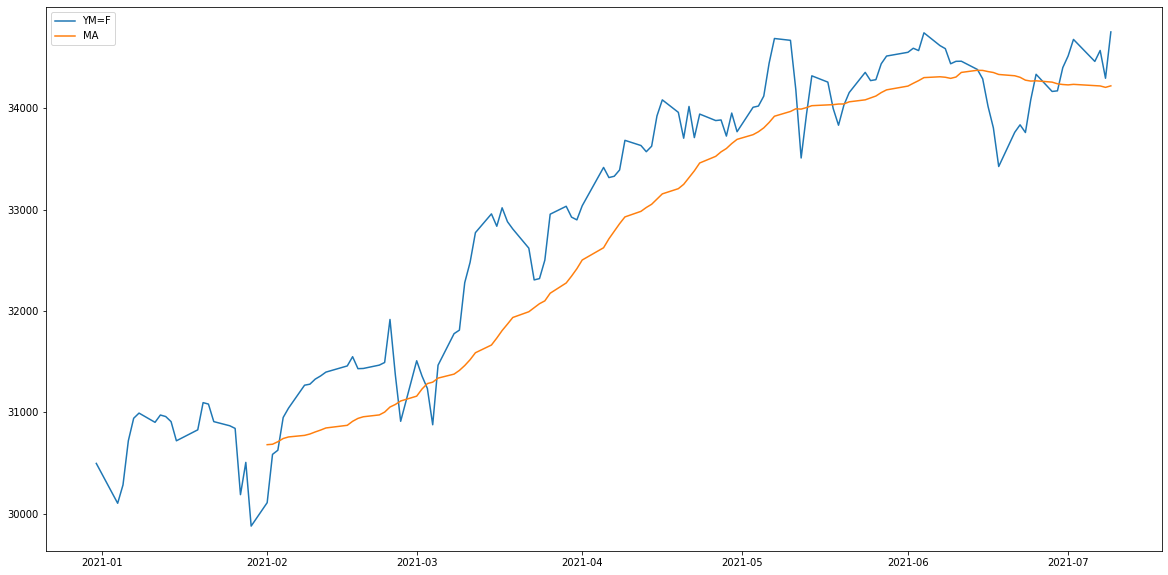

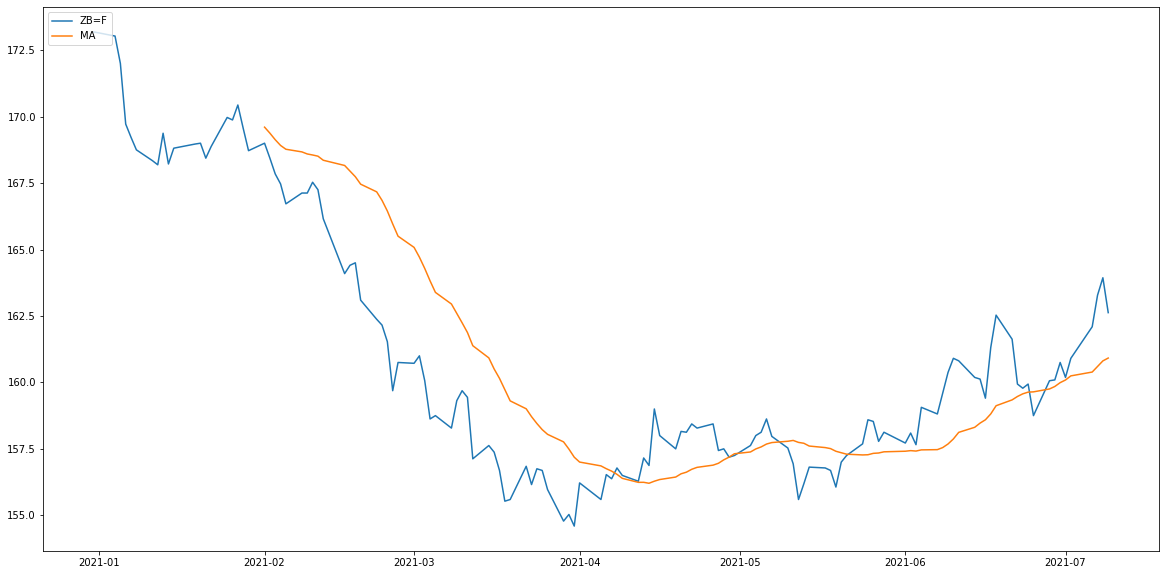

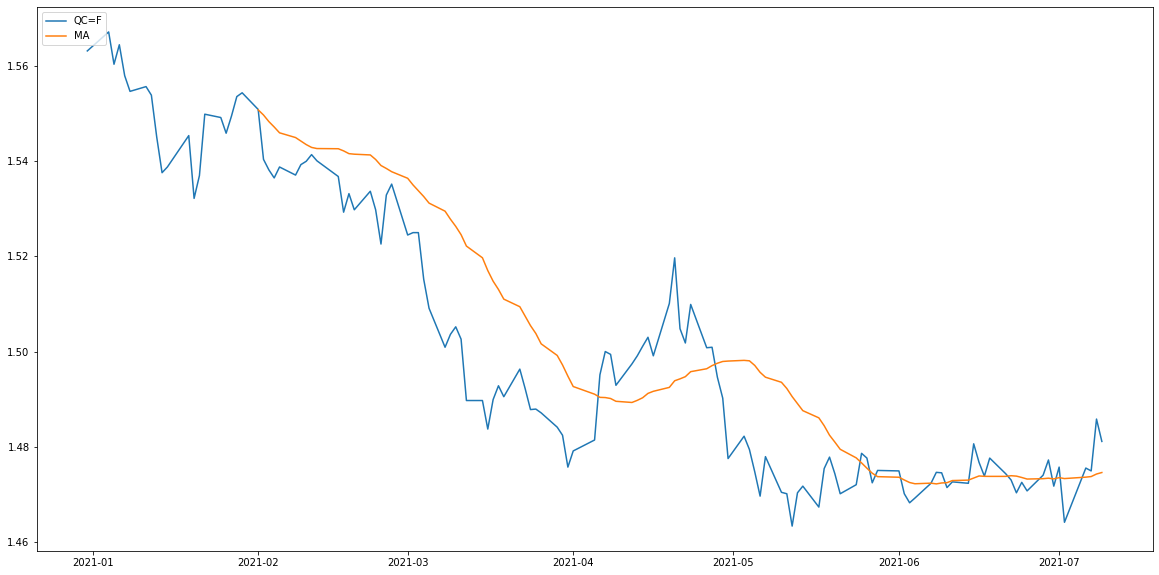

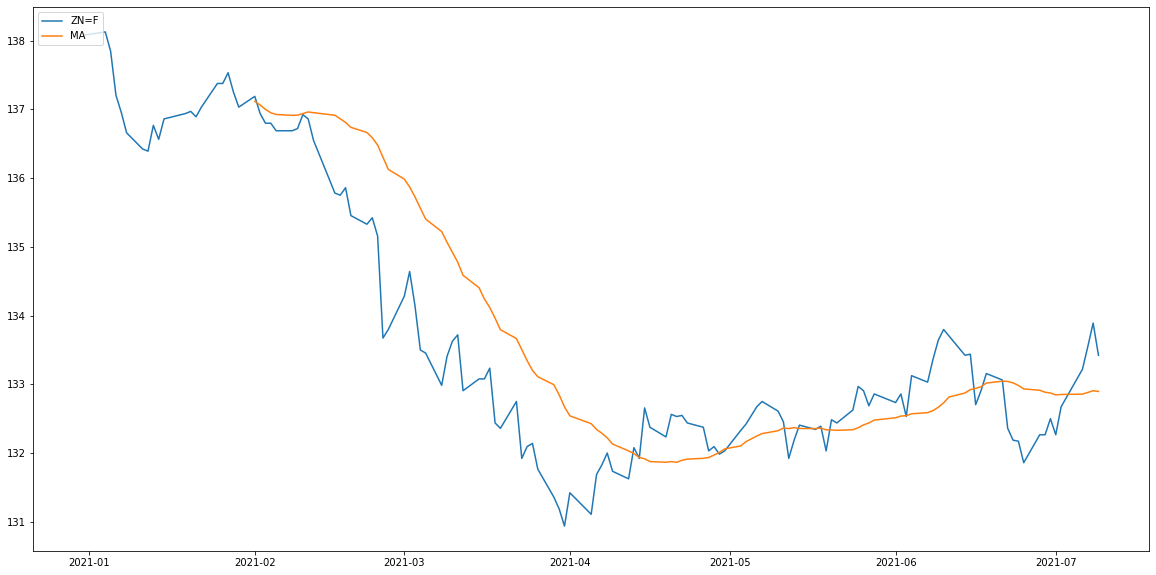

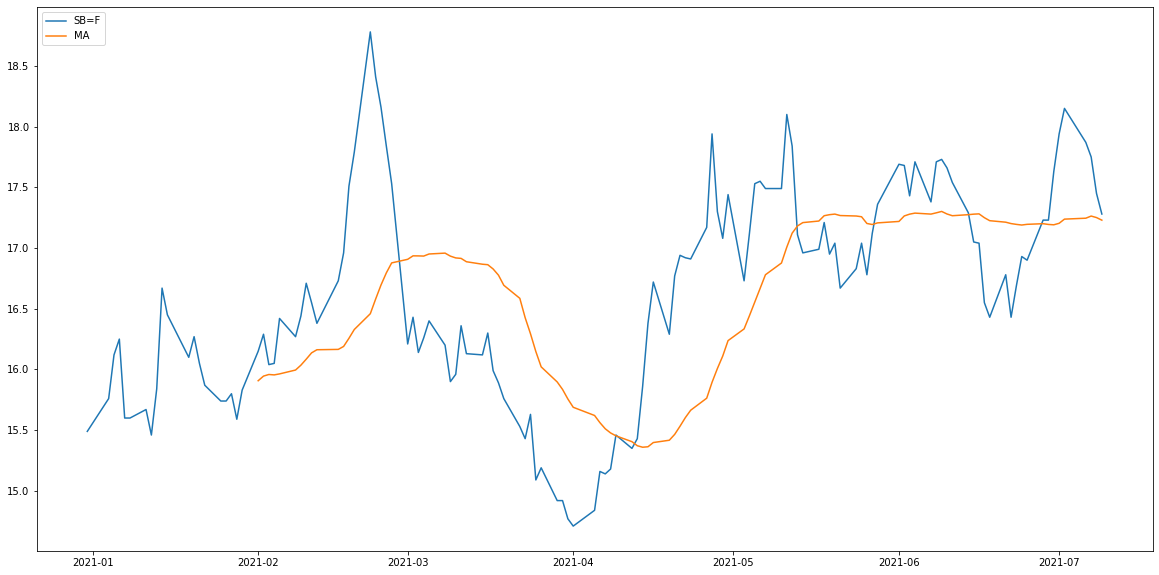

In [6]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);